<a href="https://colab.research.google.com/github/Sirfowahid/Drought_prediction_with_SPI_-_SPEI_in_Bangladesh/blob/main/Drought_by_SPI_and_SPEI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projects/19. SPI & SPEI Calculation Using ML/Rajshahi station SPI.csv')
data.head()

,Year,Month,SPI-1,SPI-3,SPI-6,SPI-9,SPI-12,precipitation
0,1990,1,-0.19,0.00,0.0,0.0,0.0,0
1,1990,2,1.12,0.00,0.0,0.0,0.0,34
2,1990,3,1.00,1.06,0.0,0.0,0.0,46
3,1990,4,0.98,1.26,0.0,0.0,0.0,97
4,1990,5,1.87,2.12,0.0,0.0,0.0,301


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           396 non-null    int64  
 1   Month          396 non-null    int64  
 2   SPI-1          396 non-null    float64
 3   SPI-3          396 non-null    float64
 4   SPI-6          396 non-null    float64
 5   SPI-9          396 non-null    float64
 6   SPI-12         396 non-null    float64
 7   precipitation  396 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.9 KB


In [ ]:
data.describe()

,Year,Month,SPI-1,SPI-3,SPI-6,SPI-9,SPI-12,precipitation
count,396.00000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,2006.00000,6.500000,0.132449,0.015707,0.000530,0.000076,-0.000354,115.141414
std,9.53395,3.456419,0.902268,0.975888,0.995024,0.991341,0.987373,130.213282
min,1990.00000,1.000000,-3.340000,-2.810000,-2.510000,-2.660000,-2.900000,0.000000
25%,1998.00000,3.750000,-0.390000,-0.692500,-0.675000,-0.605000,-0.590000,5.750000
50%,2006.00000,6.500000,0.175000,0.035000,0.030000,0.055000,0.040000,73.500000
75%,2014.00000,9.250000,0.672500,0.662500,0.630000,0.592500,0.492500,188.000000
max,2022.00000,12.000000,2.590000,2.920000,2.780000,2.870000,2.620000,763.000000


In [ ]:
cols = data.columns
cols

Index(['Year', 'Month', 'SPI-1', 'SPI-3', 'SPI-6', 'SPI-9', 'SPI-12',
       'precipitation'],
      dtype='object')

In [ ]:
dataset = data[cols[2:]]
dataset.head()

,SPI-1,SPI-3,SPI-6,SPI-9,SPI-12,precipitation
0,-0.19,0.00,0.0,0.0,0.0,0
1,1.12,0.00,0.0,0.0,0.0,34
2,1.00,1.06,0.0,0.0,0.0,46
3,0.98,1.26,0.0,0.0,0.0,97
4,1.87,2.12,0.0,0.0,0.0,301


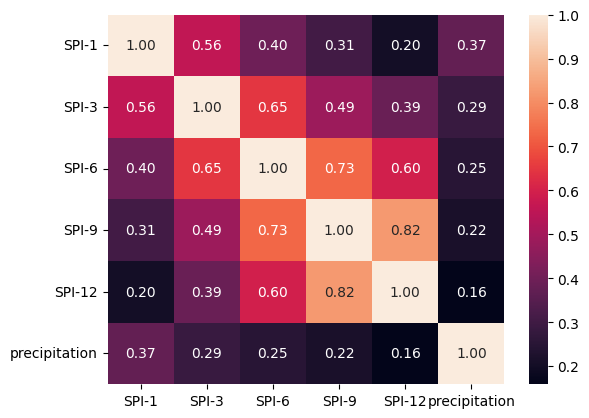

In [ ]:
sns.heatmap(dataset.corr(),annot=True,fmt='.2f')
plt.show()

# SPI 1

In [ ]:
input = dataset[cols[-1]]
target = dataset[cols[2]]

In [ ]:
input

0        0
1       34
2       46
3       97
4      301
      ... 
391    263
392    329
393     57
394      0
395      1
Name: precipitation, Length: 396, dtype: int64

In [ ]:
target.shape

(396,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input,target,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(x_train.values.reshape(-1,1),y_train)

RandomForestRegressor(random_state=0)

In [ ]:
output = regressor.predict(x_train.values.reshape(-1,1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train,output)

0.5712342745017274

In [ ]:
output_test = regressor.predict(x_test.values.reshape(-1,1))

In [ ]:
r2_score(y_test,output_test)

-0.06037156973715918

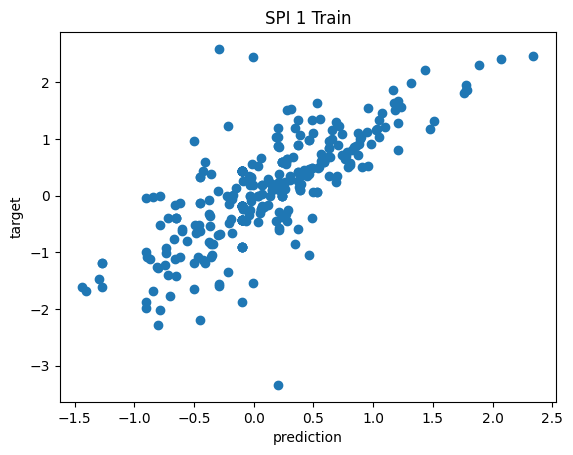

In [ ]:
plt.scatter(output,y_train)
plt.xlabel('prediction')
plt.ylabel('target')
plt.title('SPI 1 Train')
plt.show()

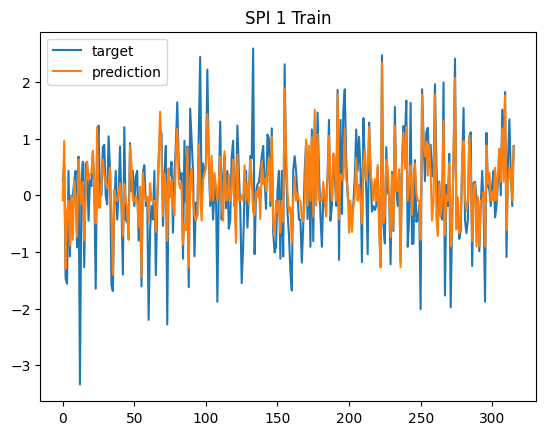

In [ ]:
plt.plot(y_train.values)
plt.plot(output)
plt.legend(['target','prediction'])
plt.title('SPI 1 Train')
plt.show()

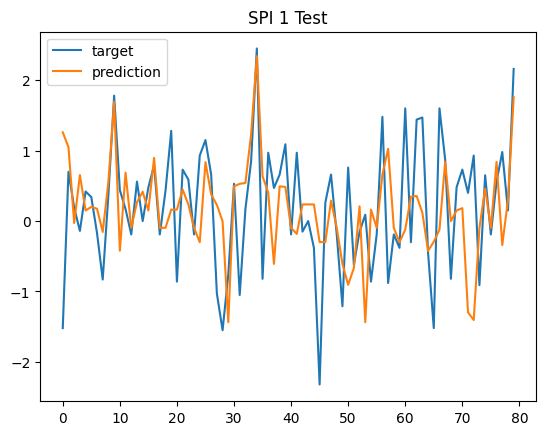

In [ ]:
plt.plot(y_test.values)
plt.plot(output_test)
plt.legend(['target','prediction'])
plt.title('SPI 1 Test')
plt.show()

# SPI 3

In [ ]:
input = dataset[cols[-1]]
target = dataset[cols[3]]

In [ ]:
input

0        0
1       34
2       46
3       97
4      301
      ... 
391    263
392    329
393     57
394      0
395      1
Name: precipitation, Length: 396, dtype: int64

In [ ]:
target.shape

(396,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(input,target,test_size=0.2,random_state=42)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(x_train.values.reshape(-1,1),y_train)

RandomForestRegressor(random_state=0)

In [ ]:
output = regressor.predict(x_train.values.reshape(-1,1))

In [ ]:
r2_score(y_train,output)

0.48358013965331914

In [ ]:
output_test = regressor.predict(x_test.values.reshape(-1,1))

In [ ]:
r2_score(y_test,output_test)

-0.03498530276755596

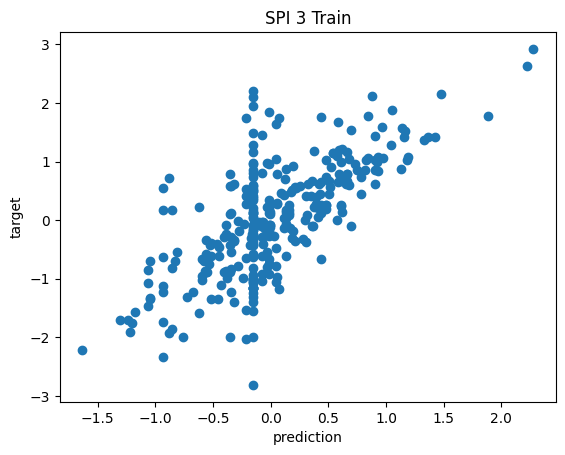

In [ ]:
plt.scatter(output,y_train)
plt.xlabel('prediction')
plt.ylabel('target')
plt.title('SPI 3 Train')
plt.show()

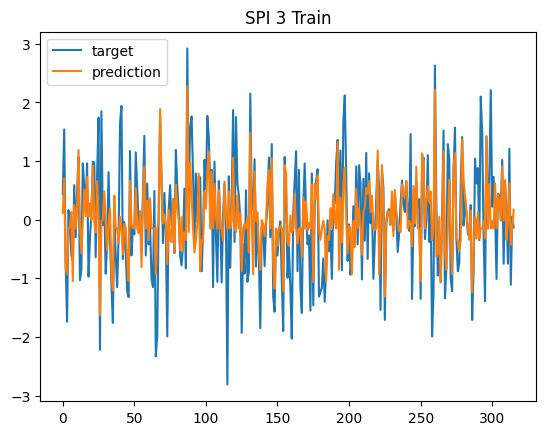

In [ ]:
plt.plot(y_train.values)
plt.plot(output)
plt.legend(['target','prediction'])
plt.title('SPI 3 Train')
plt.show()

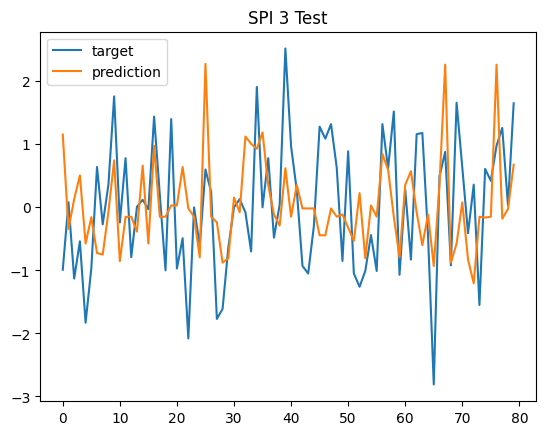

In [ ]:
plt.plot(y_test.values)
plt.plot(output_test)
plt.legend(['target','prediction'])
plt.title('SPI 3 Test')
plt.show()

# SPI 6

In [ ]:
input = dataset[cols[-1]]
target = dataset[cols[4]]

In [ ]:
input

0        0
1       34
2       46
3       97
4      301
      ... 
391    263
392    329
393     57
394      0
395      1
Name: precipitation, Length: 396, dtype: int64

In [ ]:
target.shape

(396,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(input,target,test_size=0.2,random_state=0)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(x_train.values.reshape(-1,1),y_train)

RandomForestRegressor(random_state=42)

In [ ]:
output = regressor.predict(x_train.values.reshape(-1,1))

In [ ]:
r2_score(y_train,output)

0.5274109076839695

In [ ]:
output_test = regressor.predict(x_test.values.reshape(-1,1))

In [ ]:
r2_score(y_test,output_test)

-0.3370826829255502

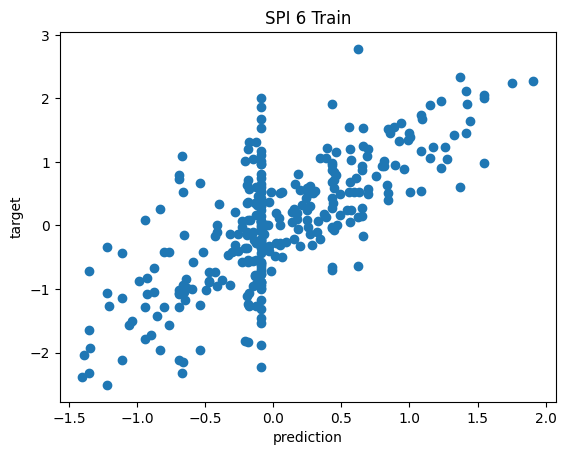

In [ ]:
plt.scatter(output,y_train)
plt.xlabel('prediction')
plt.ylabel('target')
plt.title('SPI 6 Train')
plt.show()

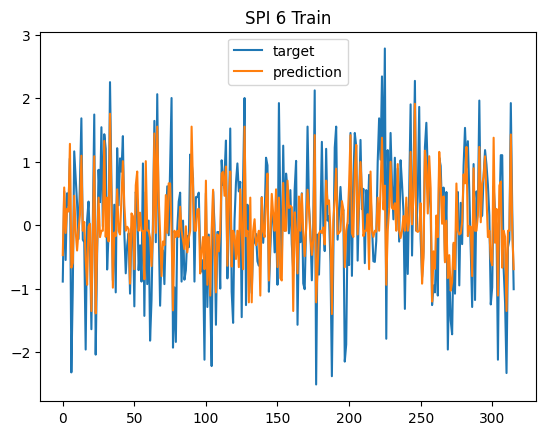

In [ ]:
plt.plot(y_train.values)
plt.plot(output)
plt.legend(['target','prediction'])
plt.title('SPI 6 Train')
plt.show()

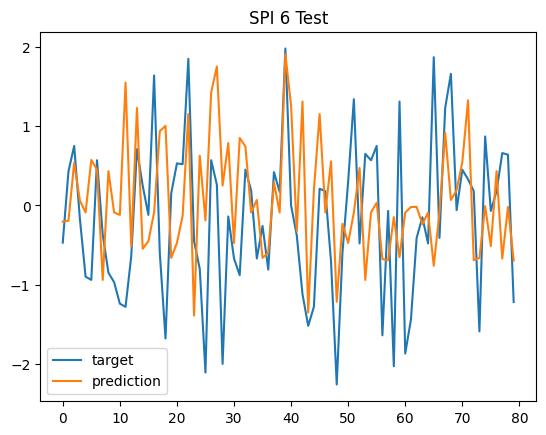

In [ ]:
plt.plot(y_test.values)
plt.plot(output_test)
plt.legend(['target','prediction'])
plt.title('SPI 6 Test')
plt.show()